## <font color ='brown'>Importing Libraries</font> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
# warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


## <font color ='brown'>Gathering Data</font>

In [21]:
train_df = pd.read_csv('../input/customer-churn-prediction-2020/train.csv')
df = train_df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [22]:
df.drop("area_code", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   international_plan             4250 non-null   object 
 3   voice_mail_plan                4250 non-null   object 
 4   number_vmail_messages          4250 non-null   int64  
 5   total_day_minutes              4250 non-null   float64
 6   total_day_calls                4250 non-null   int64  
 7   total_day_charge               4250 non-null   float64
 8   total_eve_minutes              4250 non-null   float64
 9   total_eve_calls                4250 non-null   int64  
 10  total_eve_charge               4250 non-null   float64
 11  total_night_minutes            4250 non-null   float64
 12  total_night_calls              4250 non-null   i

In [5]:
categ_columns = []
for col in df.columns:
    if df[col].nunique() <= 10:
        categ_columns.append(col)

print("categ numericals columns are: \n {}".format(categ_columns))

Num_cols = list(set(df.columns) - set(categ_columns)- set(["state"]))
print('nums numericals columns are:\n {}'.format(Num_cols))

categ numericals columns are: 
 ['international_plan', 'voice_mail_plan', 'number_customer_service_calls', 'churn']
nums numericals columns are:
 ['total_eve_charge', 'total_day_minutes', 'account_length', 'total_night_minutes', 'total_intl_calls', 'total_day_charge', 'total_night_charge', 'total_night_calls', 'total_eve_minutes', 'total_intl_minutes', 'total_day_calls', 'number_vmail_messages', 'total_intl_charge', 'total_eve_calls']


In [22]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

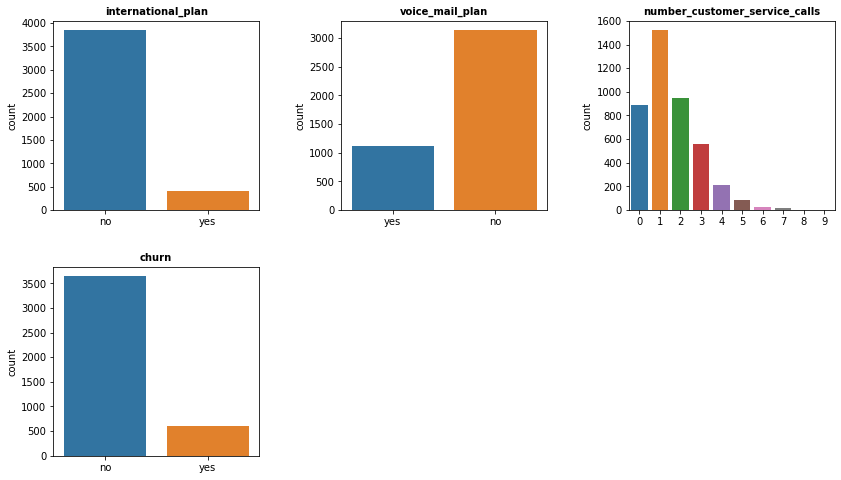

In [6]:
fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(wspace = 0.4, hspace = 0.3)

for i, col in enumerate(categ_columns): 
    ax = fig.add_subplot(2,3, i + 1)
    sns.countplot(x = col, data = df, ax=ax)
    ax.set_title(f'{col}', fontsize=10, fontweight='bold')
    plt.gca().set(xlabel=None) # To turn off the x-axis labels in a Seaborn plot 
    

plt.show()

# Class balance


In [45]:
# the frequantly table below vividly illustrates the imbalance in target variable; it means the loyal ad disloyal customers are not represented in data equally.
df["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

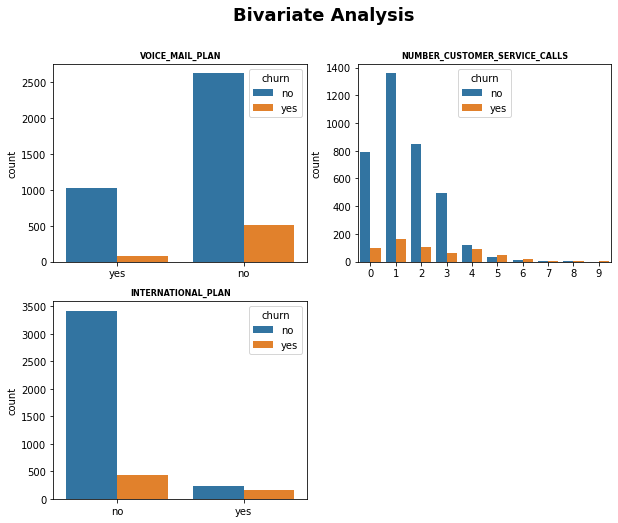

In [46]:
cols = list(set(categ_columns) - set(["churn"]))
num_rows = 2
num_cols = 2
fig.subplots_adjust(hspace=1.2, wspace=0.4)
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Bivariate Analysis",  fontsize=18, fontweight='bold')
for i, col in enumerate(cols):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, hue="churn", data=df, ax = ax)
    plt.gca().set(xlabel=None) # To turn off the x-axis labels in a Seaborn plot   
    ax.set_title(f'{col.upper()}', fontdict={'fontsize': 8, 'fontweight': 'bold'})  # Customize the title font if needed
plt.show()

In [47]:
pd.crosstab(df["voice_mail_plan"], df["churn"], margins=True)

churn,no,yes,All
voice_mail_plan,,,
no,2622,516,3138
yes,1030,82,1112
All,3652,598,4250


When the number of customer service calls increases to 4 or more, the probability of a customer churning or not churning approaches the same level. when I comes to International plan, you see when International planis is on, churn rate increases.

In [48]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 10}
axlab_dict = {'family': 'serif', 'color': 'black','size': 8}

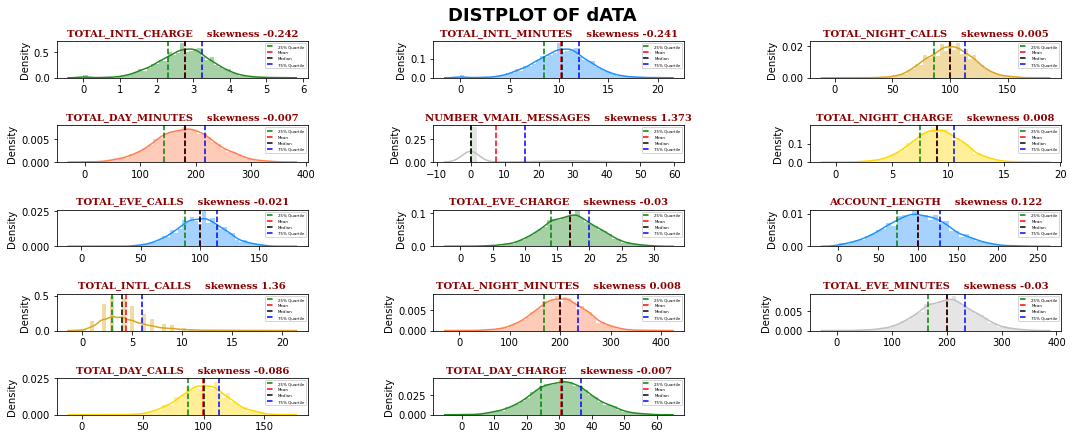

In [49]:
fig = plt.figure(figsize=(18, 8))
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=1.3 , wspace=0.5)

for index, col in enumerate(Num_cols):
    ax = fig.add_subplot(6,3, index + 1)
    sns.distplot(df[col], color= colours[index], ax = ax)
    ax.axvline(df[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(df[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(df[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(df[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(),3)}', fontdict=axtitle_dict)
    plt.gca().set(xlabel=None) # To turn off the x-axis labels in a Seaborn plot   
    ax.legend(fontsize=4) 

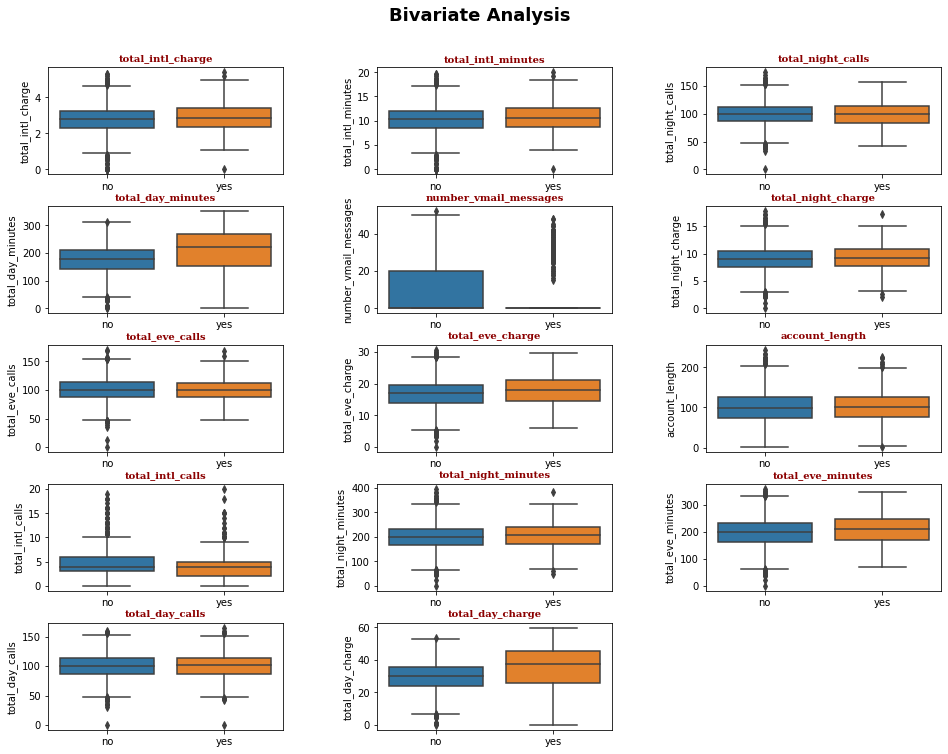

In [50]:
#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[16,14])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6,3, i+1)
    sns.boxplot(x = 'churn' , y =col , ax=a  , data = df )
    plt.gca().set(xlabel=None) # To turn off the x-axis labels in a Seaborn plot   
    a.set_title(col , fontdict=axtitle_dict)

Total Day Minutes and Total Day Charges: These seem to be potential indicators of churn. Higher usage in terms of day minutes and corresponding charges might correlate with a higher churn rate.

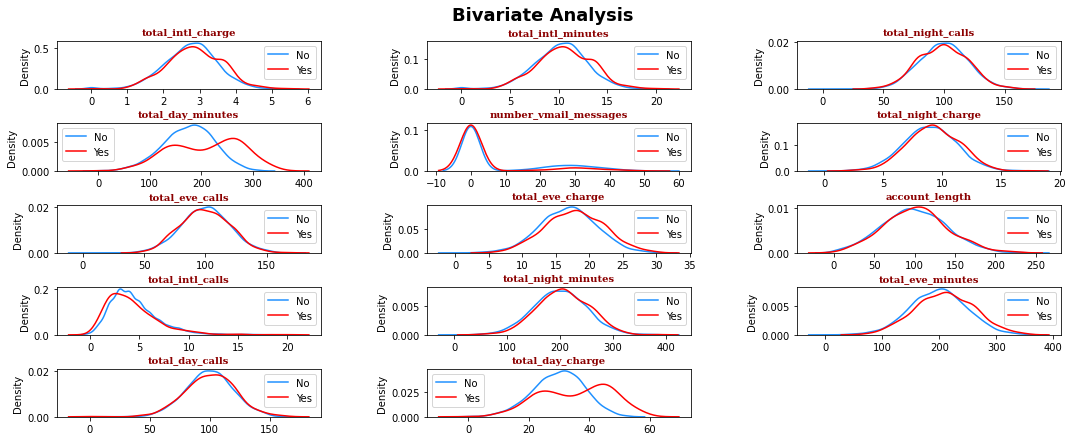

In [52]:
fig = plt.figure(figsize=[18, 8])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.7, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df[df['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df[df['churn']=='yes'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 10)

In [19]:
df_1 = df.copy()

## <font color ='brown'>Outliers Detection</font> 

In [9]:
# Check of outliers by applying the IQR method checking if values are way outside the IQR borders.
# numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[Num_cols]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

total_eve_charge         True
total_day_minutes        True
account_length           True
total_night_minutes      True
total_intl_calls         True
total_day_charge         True
total_night_charge       True
total_night_calls        True
total_eve_minutes        True
total_intl_minutes       True
total_day_calls          True
number_vmail_messages    True
total_intl_charge        True
total_eve_calls          True
dtype: bool

In [10]:
# Finding the IQR For Budget columns
dict = {}
for col in Num_cols:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR  = percentile75 - percentile25 
    upper_limit = percentile75 + 1.5 * IQR 
    lower_limit = percentile25 - 1.5 * IQR
    dict['upper_limit'+ '_' + col] = upper_limit
    dict['lower_limit'+ '_' + col] = lower_limit 

In [11]:
for col in Num_cols:
    df[col] = np.where(
        df[col] > dict['upper_limit_' + col],
        dict['upper_limit_' + col],
        np.where(
            df[col] < dict['lower_limit_' + col],
            dict['lower_limit_' + col],
            df[col]  
        )
    )

In [12]:
df_no_outliers = df.copy()

### Features Engineering

In [10]:
# in the table below you see, when international_plan takes in 1 the likelihood of becoming churn or not gets almost equal.
pd.crosstab(df["international_plan"], df["churn"], margins=True)

churn,no,yes,All
international_plan,,,
no,3423,431,3854
yes,229,167,396
All,3652,598,4250


<AxesSubplot:xlabel='Many_service_calls&international_plan', ylabel='count'>

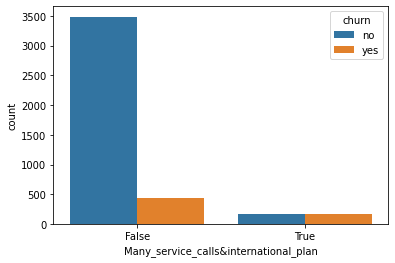

In [42]:
df["Many_service_calls"] = (df["number_customer_service_calls"] > 3) # Define the new feature: the pattern observed in international_plan, is seen here too. 

# rule1
df["Many_service_calls&international_plan"] = (df["Many_service_calls"] & df["international_plan"])
sns.countplot(data=df, x = "Many_service_calls&international_plan", hue = "churn")

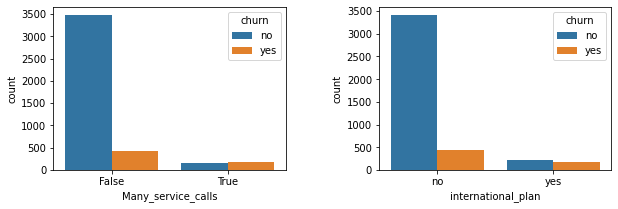

In [130]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, col in enumerate(["Many_service_calls", "international_plan"]):
    ax = fig.add_subplot(1,2, i + 1)
    sns.countplot(x = col, hue = "churn", data = df, ax = ax)
plt.show()


In [132]:
pd.crosstab(df["Many_service_calls&international_plan"], df["churn"], margins=True)

churn,no,yes,All
Many_service_calls&international_plan,,,
False,3487,428,3915
True,165,170,335
All,3652,598,4250


We will consider the combination of "Many_service_calls" & "international_plan" as a rulle that, if true for a client, indicates they will not remain loyal. As shown in the probability table above, this rule is incorrect only (428 + 165) times. Therefore, we calculate the prediction accuracy of this rull as follows: 1 - ((428 + 165)/ 4250) = 86.04 %.

In [43]:
df_newRules = df.copy()

In [196]:
df = df_newRules.copy()

In [87]:
# Neda
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
# df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({"yes": 1, "no": 0})
df['churn'] = df['churn'].map({"yes": 1, "no": 0})
df['Many_service_calls'] = df['Many_service_calls'].astype(int)
df['Many_service_calls&international_plan'] = df['Many_service_calls&international_plan'].astype(int)

df.drop(columns= ['state', 'voice_mail_plan','account_length'], inplace=True)
# df.drop(columns=[ 'total_eve_charge','total_night_charge', 'total_day_calls','total_eve_calls', 'total_night_calls', 'total_eve_minutes', 'total_night_minutes'], inplace=True)


df.drop(columns=['Many_service_calls&international_plan', 'total_day_calls','total_day_charge', 'Many_service_calls','total_eve_charge','total_night_charge', 'total_day_calls','total_eve_calls', 'total_night_calls', 'total_eve_minutes', 'total_night_minutes'], inplace=True)
# df.drop(columns= ['state', 'number_customer_service_calls', 'account_length'], inplace=True)

In [30]:
df.head()

,number_vmail_messages,total_day_minutes,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,churn,Many_service_calls&international_plan,total_net_minutes,total_net_calls,total_net_charge
0,26.0,161.6,27.47,13.7,3.0,3.70,0,0,449.90,206.0,28.070
1,0.0,243.4,41.38,12.2,5.0,3.29,0,0,283.80,214.0,17.620
2,0.0,299.4,50.90,6.6,7.0,1.78,0,0,261.05,177.0,14.315
3,0.0,166.7,28.34,10.1,3.0,2.73,0,0,335.20,243.0,21.020
4,24.0,218.2,37.09,7.5,7.0,2.03,0,0,548.15,226.0,38.085


In [13]:
df = df_no_outliers.copy()

In [129]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
# df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 

df.drop(columns= ['state', 'account_length'], inplace= True)
# df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
#                 'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
#                  'total_eve_minutes', 'total_night_minutes'], inplace=True)

# df.drop("voice_mail_plan", axis=1, inplace=True)
df.drop(columns=['total_intl_minutes', 'voice_mail_plan', 'total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [23]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 


df.drop(columns= ['state', "account_length"], inplace= True)
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [15]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26.0,13.7,3.0,3.70,1,0,611.50,329.0,55.540
1,0,0,0.0,12.2,5.0,3.29,0,0,527.20,328.0,59.000
2,1,0,0.0,6.6,7.0,1.78,2,0,560.45,248.0,65.215
3,1,0,0.0,10.1,3.0,2.73,3,0,501.90,356.0,49.360
4,0,1,24.0,7.5,7.0,2.03,3,0,766.35,314.0,75.175


# Correlation Analysis

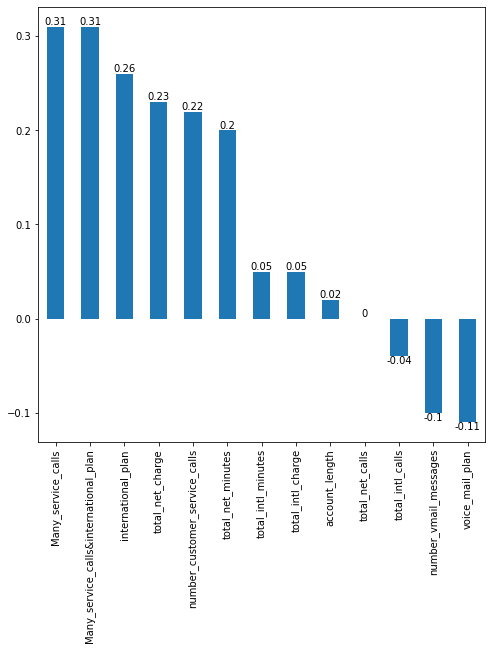

In [182]:
ax = round(df.corr()['churn'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar' , figsize = (8,8))
ax.bar_label(ax.containers[0])
plt.show()

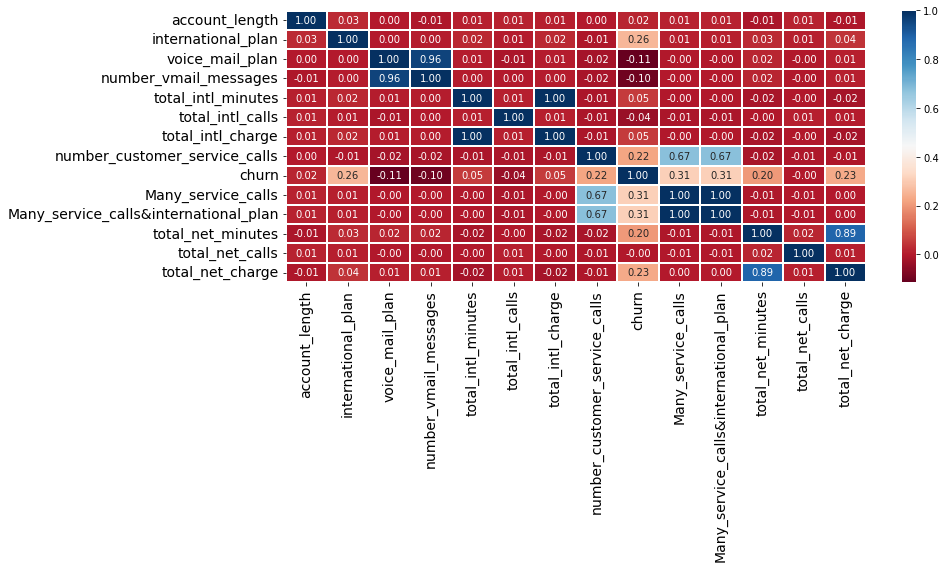

In [183]:
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
# ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
fig.show() 

## <font color ='brown'>Modelling</font>

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
X = df.drop(columns=["churn"])
y = df["churn"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# DecisionTreeClassifier witout CV
tree = DecisionTreeClassifier(random_state= 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_holdout)
print("DecisionTreeClassifier_without_CV: ", accuracy_score(y_holdout, y_pred))

# DecisionTreeClassifier with CV
search_params = {"max_depth":np.arange(2,11), 'min_samples_leaf': np.arange(2,11)}
sv = StratifiedKFold(shuffle=True, random_state=42, n_splits = 5)
best_tree = GridSearchCV(estimator=tree, param_grid=search_params, cv=sv)
best_tree.fit(X_train, y_train)

# Cross_validation assesment
print("best_params", best_tree.best_params_)
print("best_Score_CV", best_tree.best_score_)

# Holdout assesment
y_pred = best_tree.predict(X_holdout)
print("DecisionTreeClassifier_CV: ", accuracy_score(y_holdout, y_pred)) # if we get a good increase in both CV assesment and holdout assesment, it is a good sign of a good model.

DecisionTreeClassifier_without_CV:  0.9494117647058824
best_params {'max_depth': 5, 'min_samples_leaf': 7}
best_Score_CV 0.9738235294117648
DecisionTreeClassifier_CV:  0.971764705882353


**Grid Search for parameter tuning by hand**

In [47]:
# Grid Search for parameter tuning by hand
from tqdm.notebook import tqdm

scores = []
max_depth = np.arange(2,11)
min_samples_leaf = np.arange(2,11)
sv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

for depth in max_depth:
    for leaf in min_samples_leaf:
        tree = DecisionTreeClassifier(random_state=17, max_depth=depth, min_samples_leaf=leaf)
        score_CV = cross_val_score(estimator=tree, X = X_train, y = y_train, cv = sv).mean()
        tree.fit(X = X_train, y = y_train)
        y_pred = tree.predict(X=X_holdout)
        score_holdout = accuracy_score(y_holdout, y_pred)
        scores.append((depth, leaf, score_CV, score_holdout))

In [63]:
# df_score_cross = pd.crosstab(index = df_score["depth"], columns = df_score["min_leaf"], values=[df_score["score_cv"]], aggfunc="mean")
# df_score_cross = pd.pivot(index = df_score["depth"], columns = df_score["min_leaf"], values=[df_score["score_cv"]])

df_score = pd.DataFrame(scores, columns = ["depth", "min_leaf", "score_cv", "score_holdout"])
best = df_score[df_score["score_cv"] == df_score["score_cv"].max()].iloc[0].tolist()
print(f"best tree is: max_depth --> {best[0]}, min_samples_leaf --> {best[1]}, score_cv --> {best[2]:.3f}, score_holdout --> {best[3]:.3f}")
tree = DecisionTreeClassifier(random_state=17, max_depth=best[0], min_samples_leaf=best[1])

best tree is: max_depth --> 9.0, min_samples_leaf --> 2.0, score_cv --> 0.973, score_holdout --> 0.967


**"Random Forest"**

In [199]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.9741176470588235

In [ ]:
tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score , classification_report , confusion_matrix  ,roc_curve , roc_auc_score , accuracy_score
from sklearn.metrics import precision_recall_curve , auc ,f1_score , plot_confusion_matrix , precision_score , recall_score
from sklearn.tree import DecisionTreeClassifier

In [23]:
model_list = []
accuracy_list = []
recall_list = []
precision_list = []
f1_score_list= [] 
cross_val_score_list = []

In [135]:
def Model_features(X_train , y_train , X_test , y_test , y_pred , classifier  , model_name):
#     fig ,ax = plt.subplots(figsize = (7,6))
    accuracy , precision , recall , f1_s ,c_val_score= round(accuracy_score(y_test , y_pred) , 3) , round(precision_score(y_test, y_pred, average="micro")  ,3), round(recall_score(y_test , y_pred) ,3), round(f1_score(y_test , y_pred) , 3) , round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_score_list.append(f1_s)
    cross_val_score_list.append(c_val_score)
    
#     print(f'f1  Score is :{round(specificity_score(y_test , y_pred) , 3)}')
    print(metrics.classification_report(y_test, y_pred)) 

In [134]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = round(pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False) ,2 )
    
    top_weights_selected = weights[:5]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 5 Features')
    ax = top_weights_selected.plot(kind="bar")
    ax.bar_label(ax.containers[0])
    
    return print("")

In [133]:
def confusion_matrix_plot(X_test , y_test , classifier ,classifier_name):
    ax = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues)

In [38]:
### Logistic Regression

In [131]:
model_lr= LogisticRegression(random_state=0)  
model_lr.fit(X_train, y_train) 
y_pred = model_lr.predict(X_test)
model_lr.score(X_test , y_test)

0.8647058823529412

Accuracy Score is :0.865
Precision Score is :0.865
Recall Score is :0.178
f1  Score is :0.286
cross val score is :0.868
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       721
           1       0.72      0.18      0.29       129

    accuracy                           0.86       850
   macro avg       0.79      0.58      0.61       850
weighted avg       0.85      0.86      0.83       850




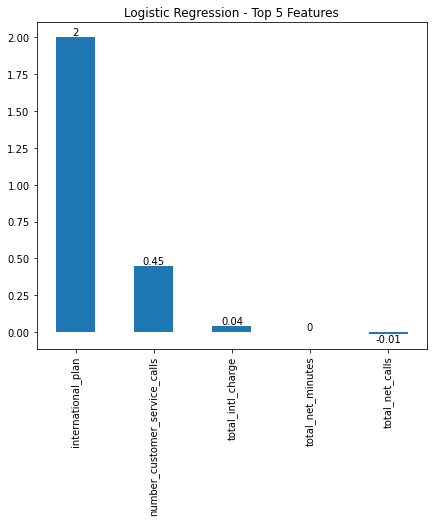

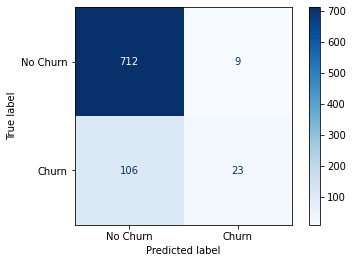

In [136]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , model_lr , "Logistic Reegression")   
feature_weights(X_train , model_lr , "Logistic Regression")
confusion_matrix_plot(X_test , y_test , model_lr , "Logistic Regression")

### Support Vector Machine

In [137]:
svm = SVC(kernel='rbf', probability=True) 
svm.fit(X_train,y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred = svm.predict(X_test)
svm.score(X_test , y_test)  

0.8482352941176471

Accuracy Score is :0.848
Precision Score is :0.848
Recall Score is :0.0
f1  Score is :0.0
cross val score is :0.859
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       0.00      0.00      0.00       129

    accuracy                           0.85       850
   macro avg       0.42      0.50      0.46       850
weighted avg       0.72      0.85      0.78       850



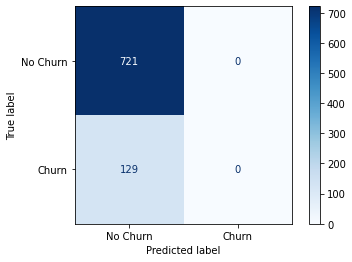

In [138]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , svm , "Support Vector Machine")   
confusion_matrix_plot(X_test , y_test , svm , "Support Vector Machine")

### DecisionTreeClassifier

In [139]:
tree = DecisionTreeClassifier(random_state=17)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree.score(X_test , y_test) 

0.8858823529411765

Accuracy Score is :0.951
Precision Score is :0.951
Recall Score is :0.853
f1  Score is :0.84
cross val score is :0.952
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       721
           1       0.83      0.85      0.84       129

    accuracy                           0.95       850
   macro avg       0.90      0.91      0.91       850
weighted avg       0.95      0.95      0.95       850



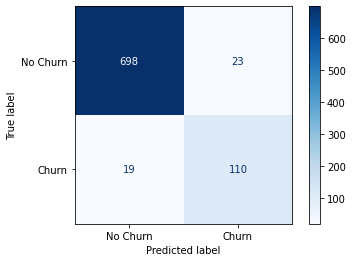

In [44]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , dtc , "Decision Tree Classifier")   
confusion_matrix_plot(X_test , y_test , dtc , "Decision Tree Classifier")

### Random Forest Classifier

In [140]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf.score(X_test , y_test) 

0.928235294117647

Accuracy Score is :0.976
Precision Score is :0.976
Recall Score is :0.868
f1  Score is :0.918
cross val score is :0.974
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       721
           1       0.97      0.87      0.92       129

    accuracy                           0.98       850
   macro avg       0.98      0.93      0.95       850
weighted avg       0.98      0.98      0.98       850



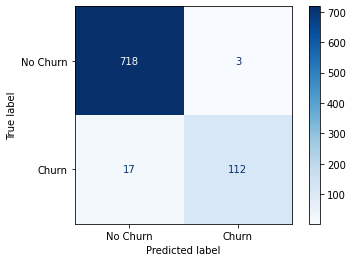

In [46]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , rf , "Random Forest Classifier")   
confusion_matrix_plot(X_test , y_test , rf , "Random Forest Classifier")

### GradientBoostingClassifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
xg.score(X_test , y_test) 

0.9129411764705883

Accuracy Score is :0.967
Precision Score is :0.967
Recall Score is :0.837
f1  Score is :0.885
cross val score is :0.973
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       721
           1       0.94      0.84      0.89       129

    accuracy                           0.97       850
   macro avg       0.96      0.91      0.93       850
weighted avg       0.97      0.97      0.97       850



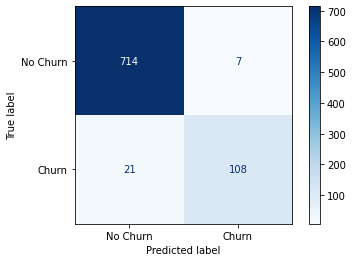

In [48]:
Model_features(X_train , y_train , X_test , y_test  , y_pred , xg , "Gradient Boost Classifier")   
confusion_matrix_plot(X_test , y_test , xg , "Gradient Boost Classifier")

In [49]:
dict = {'Model':model_list, 'Accuracy':accuracy_list , 'Precision':precision_list , 'f1_score':f1_score_list , 'Recall':recall_list ,'Cross_Val_Score':cross_val_score_list}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'Accuracy')
model_df 

,Model,Accuracy,Precision,f1_score,Recall,Cross_Val_Score
3,Random Forest Classifier,0.976,0.976,0.918,0.868,0.974
4,Gradient Boost Classifier,0.967,0.967,0.885,0.837,0.973
2,Decision Tree Classifier,0.951,0.951,0.840,0.853,0.952
0,Logistic Reegression,0.859,0.859,0.277,0.178,0.861
1,Support Vector Machine,0.848,0.848,0.000,0.000,0.859


In [50]:
from joblib import dump
dump(rf, 'rf.joblib') 
dump(xg, 'xg.joblib') 

['xg.joblib']